# Document Clustering

### Required packages 

In [1]:
import os
import pandas as pd
import wikipedia

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from wordcloud import WordCloud

### Selection of topics to pull articles 

In [8]:
articles=['Data Science',
          'Artificial intelligence',
          'Deep Learning',
          'European Central Bank',
          'Bank',
          'Financial technology',
          'International Monetary Fund',
          'Basketball',
          'Swimming',
          'Badminton']

### Pulling articles from Wikipedia 

In [9]:
wiki_lst=[]
title=[]
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Deep Learning
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
loading content:  Badminton


### Quick look at the pulled content 

In [10]:
print("examine content")
wiki_lst

examine content


['Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.\n\n\n== Foundations ==\nData science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big dat

### Calculating TF-IDF scores 

In [11]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

### Identifying optimal number of clusters

In [12]:
Sum_of_squared_distances = []
K = range(2,10)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

#### Plotting Elbow Curve 

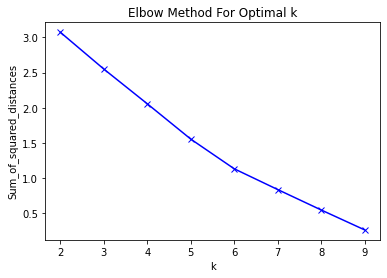

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Clustering of articles 

In [16]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
7                   Basketball        0
9                    Badminton        0
3        European Central Bank        1
4                         Bank        1
6  International Monetary Fund        1
0                 Data Science        2
1      Artificial intelligence        3
2                Deep Learning        3
5         Financial technology        4
8                     Swimming        5


### Plotting Wordcloud of the identified clusters 

Cluster: 0
Titles
 Basketball
  Badminton


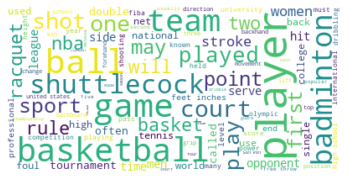

Cluster: 1
Titles
       European Central Bank
                        Bank
 International Monetary Fund


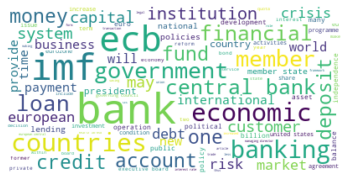

Cluster: 2
Titles
 Data Science


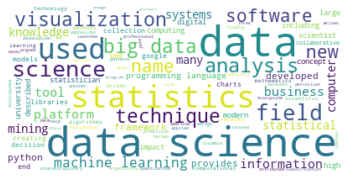

Cluster: 3
Titles
 Artificial intelligence
           Deep Learning


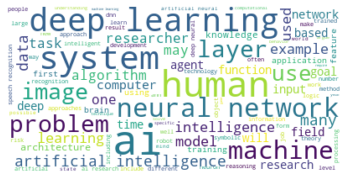

Cluster: 4
Titles
 Financial technology


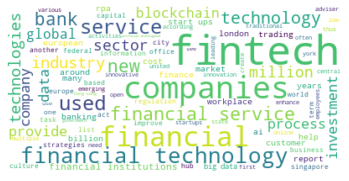

Cluster: 5
Titles
 Swimming


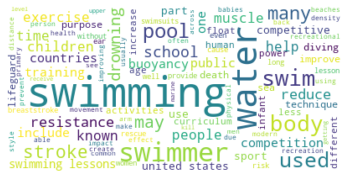

In [17]:
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()
